<a href="https://colab.research.google.com/github/dgadela/ML_HandsOn/blob/master/MentalHealthAlgorithm_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

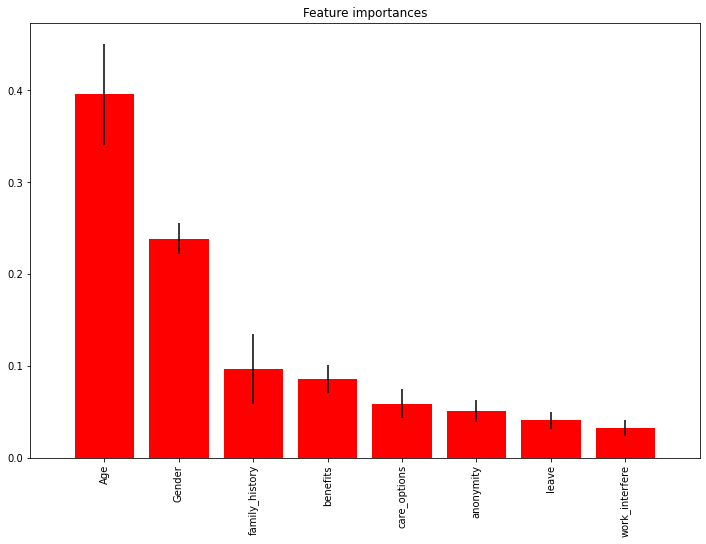

In [6]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB 
#Stacking
from mlxtend.classifier import StackingClassifier

#reading data
train_df=pd.read_csv("mentalHealthSurvey.csv")
train_df.head()
print(train_df.info())

#missing data calculation
total=train_df.isnull().sum().sort_values(ascending=False)
percent=(train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

#dropping missing data
train_df=train_df.drop(['comments'],axis=1)
train_df=train_df.drop(['Timestamp'],axis=1)
train_df=train_df.drop(['state'],axis=1)

#Clean NaN
defaultInt=0
defaultString='NaN'
defaultFloat=0.0
intFeatures=['Age']
stringFeatures=['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures=[]
for feature in train_df:
  if feature in intFeatures:
    train_df[feature]=train_df[feature].fillna(defaultInt)
  elif feature in stringFeatures:
    train_df[feature]=train_df[feature].fillna(defaultString)
  elif feature in floatFeatures:
    train_df[feature]=train_df[feature].fillna(defaultFloat)
  else:
    print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

#clean gender
gender=train_df['Gender'].str.lower()
gender=train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

male_str=["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str=["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str=["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row,col) in train_df.iterrows():
  if str.lower(col.Gender) in male_str:
    train_df['Gender'].replace(to_replace=col.Gender,value='male',inplace=True)
  if str.lower(col.Gender) in trans_str:
    train_df['Gender'].replace(to_replace=col.Gender,value='trans',inplace=True)
  if str.lower(col.Gender) in female_str:
    train_df['Gender'].replace(to_replace=col.Gender,value='female',inplace=True)
stk_list=['A little about you', 'p']
train_df=train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())

#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

#Fill with median values
s=pd.Series(train_df['Age'])
s[s<18]=train_df['Age'].median()
train_df['Age']=s
s=pd.Series(train_df['Age'])
s[s>120]=train_df['Age'].median()
train_df['Age']=s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

##Replace "NaN" string from defaultString
train_df['self_employed']=train_df['self_employed'].replace([defaultString],'No')
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )

#encoding Data
labelDict={}
for feature in train_df:
  le=preprocessing.LabelEncoder()
  le.fit(train_df[feature])
  le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
  train_df[feature]=le.transform(train_df[feature])
  labelKey='label_'+feature
  labelvalue=[*le_name_mapping]
  labelDict[labelKey]=labelvalue

for key,value in labelDict.items():
  print(key,value)
train_df=train_df.drop(['Country'],axis=1)
train_df.head()

#Scaling and Fitting
scaler=MinMaxScaler()
train_df['Age']=scaler.fit_transform(train_df[['Age']])
train_df.head()

#Feature Columns
feature_cols=['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X=train_df[feature_cols]
y=train_df.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
methodDict = {}
rmseDict = ()
#Build Forest and check feature importance
forest=ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


